In [1]:
import numpy as np
from lightkurve import KeplerTargetPixelFile
from lightkurve import SimpleKeplerPRF, PRFPhotometry, SceneModel
from oktopus import UniformPrior
%matplotlib inline
import matplotlib.pyplot as plt

/Users/acody/anaconda2/envs/astroconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
tpf = KeplerTargetPixelFile('../data/tpf_5405.fits')

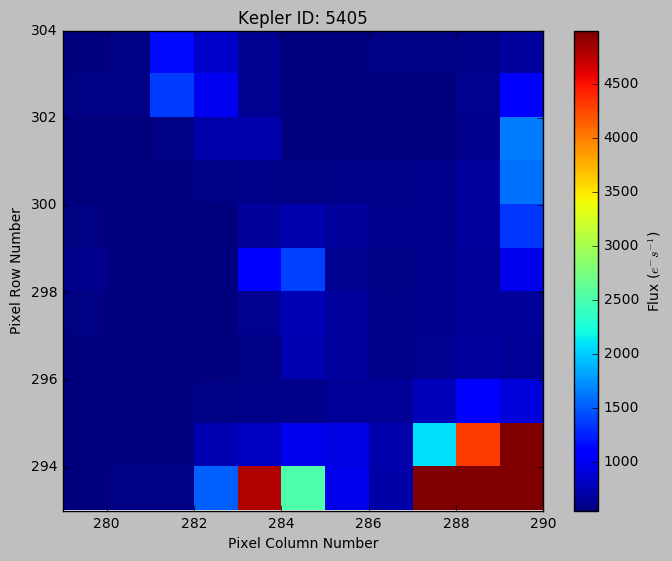

In [12]:
tpf.plot(frame=1209,interpolation='nearest')

In [6]:
np.where(tpf.pos_corr2 == 0)

(array([1209]),)

In [7]:
channel = 81

In [8]:
prf = SimpleKeplerPRF(channel=channel, shape=tpf.shape[1:], column=tpf.column, row=tpf.row)

In [9]:
scene = SceneModel(prfs=[prf])

In [10]:
prior = UniformPrior(lb=[100., 283., 297., 0.],
                     ub=[8000., 286., 300., 1000.])

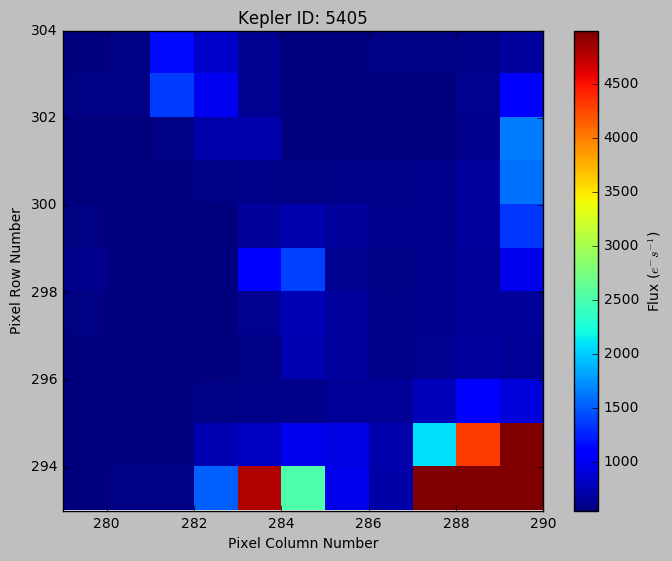

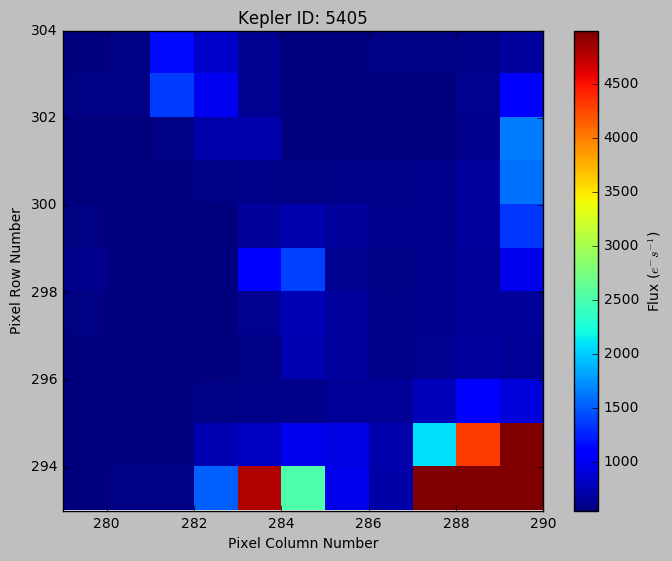

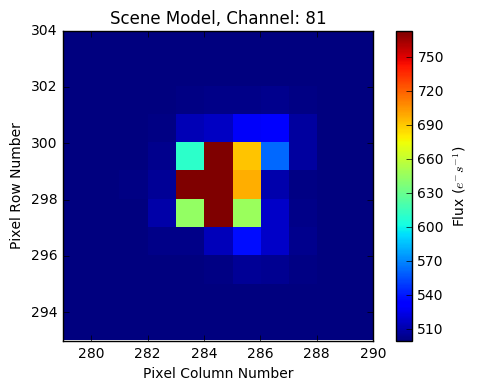

In [11]:
scene.plot(*prior.mean,interpolation='nearest')

In [58]:
phot = PRFPhotometry(scene_model=scene, prior=prior)

In [59]:
results = phot.fit(tpf.flux)

100%|██████████| 2422/2422 [01:15<00:00, 31.96it/s]


In [60]:
flux = results[:, 0]
xc = results[:, 1]
yc = results[:, 2]
bkg = results[:, 3]

(0, 2000)

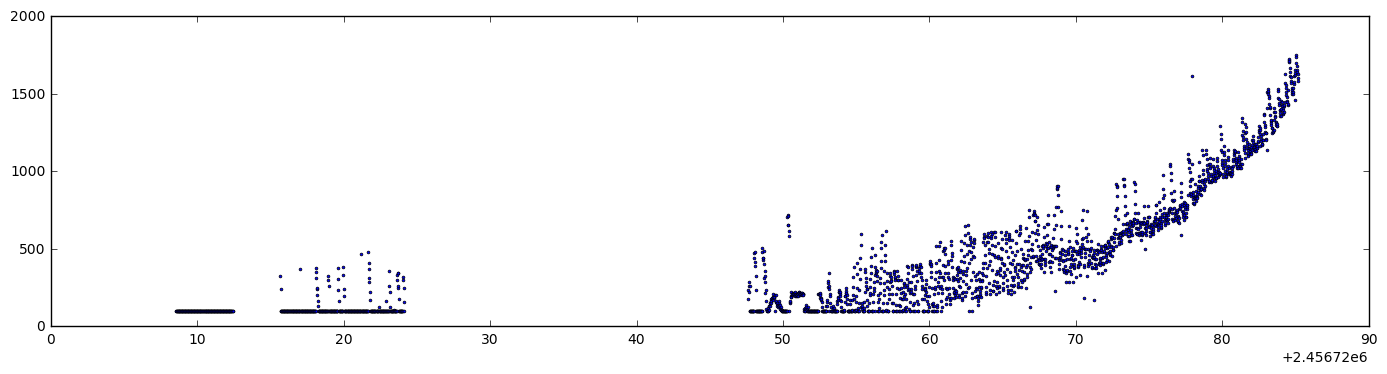

In [66]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time,flux,'o',markersize=2.)
plt.ylim(0,2000)

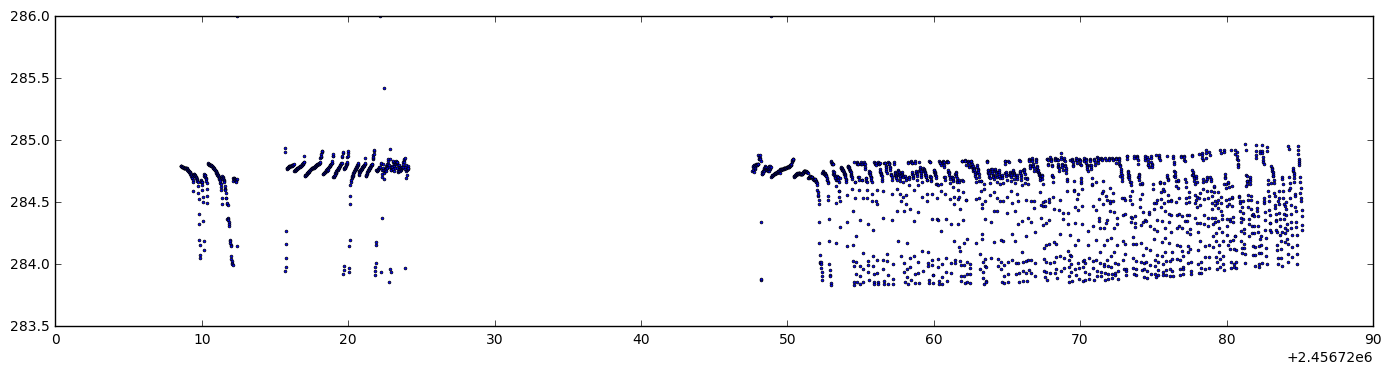

In [62]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time,xc,'o',markersize=2.)

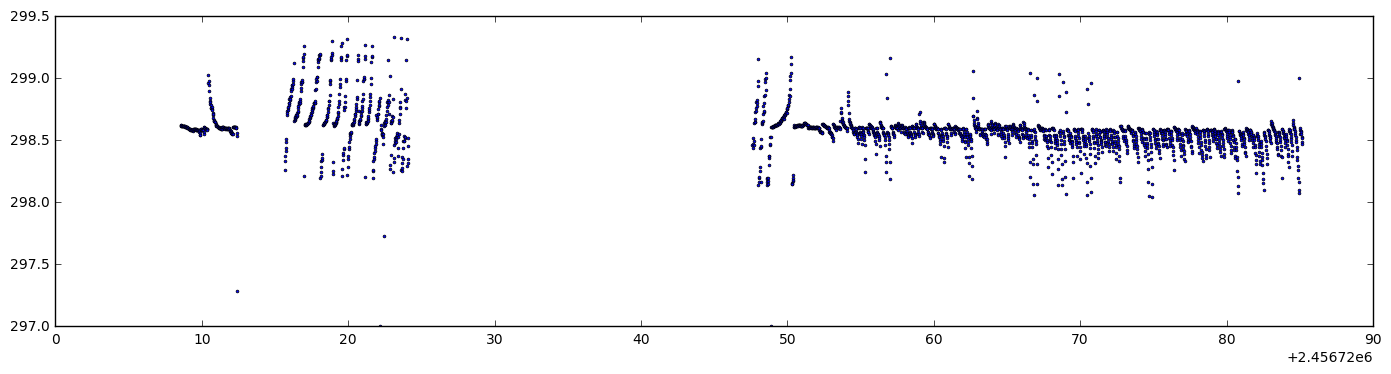

In [64]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time,yc,'o',markersize=2.)

In [110]:
tpf.time[600]-2.45672e6

47.613763368688524

### Try aperture photometry

In [132]:
aper = np.zeros(tpf.shape[1:])
aper1 = np.zeros(tpf.shape[1:])

In [133]:
aper[4:7:, 4:7] = 1
aper1[5:6, 5:6] = 1

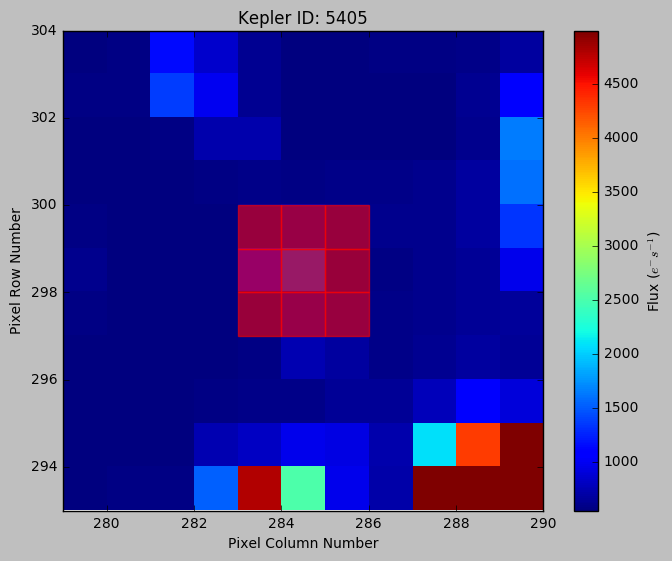

In [140]:
tpf.plot(aperture_mask=aper, mask_color='red',interpolation='nearest',frame=1209)

In [141]:
aper_lc = tpf.to_lightcurve(aperture_mask=aper.astype(bool)).flatten()

In [142]:
aperflux = aper_lc.flux

(0.95, 1.05)

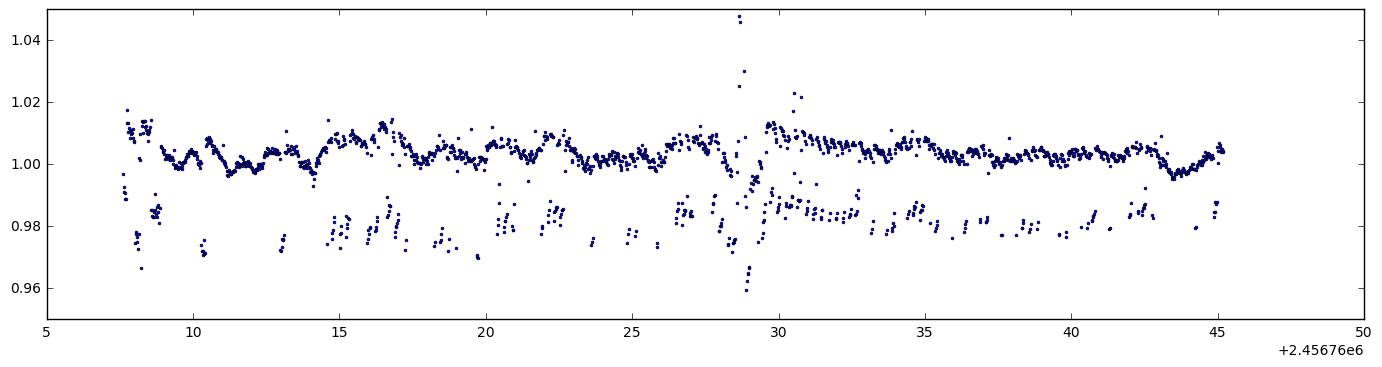

In [145]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time,aperflux,'o',markersize=2.)
plt.xlim(2.45672e6+45,2.45672e6+90)
plt.ylim(0.95,1.05)

In [146]:
aperlcshort = aper_lc[600:]
aperlccorr = aperlcshort.correct()

100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


In [147]:
aperfluxcorr = aperlccorr.flux

(0.95, 1.05)

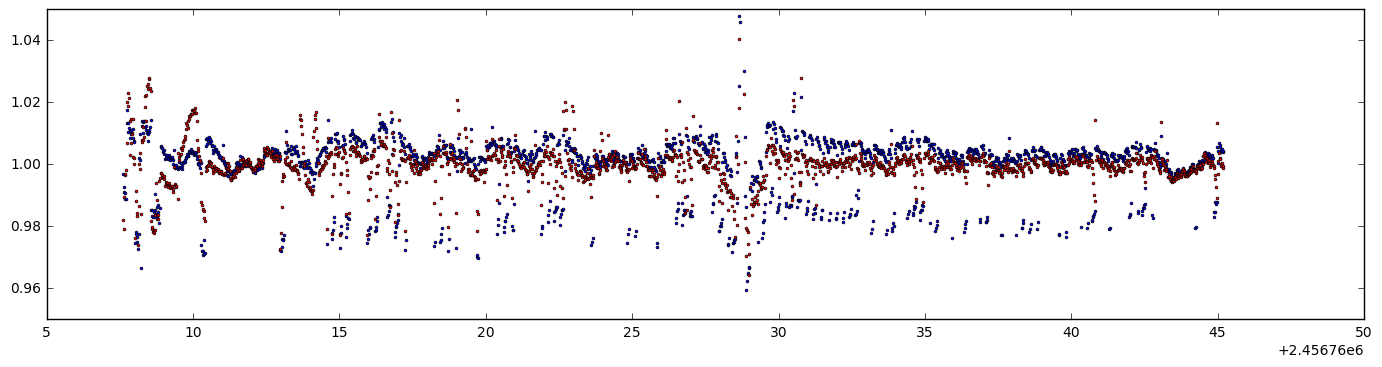

In [148]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time,aperflux,'o',markersize=2.)
plt.plot(tpf.time[600:],aperfluxcorr,'ro',markersize=2.)
plt.xlim(2.45672e6+45,2.45672e6+90)
plt.ylim(0.95,1.05)

(0.96, 1.03)

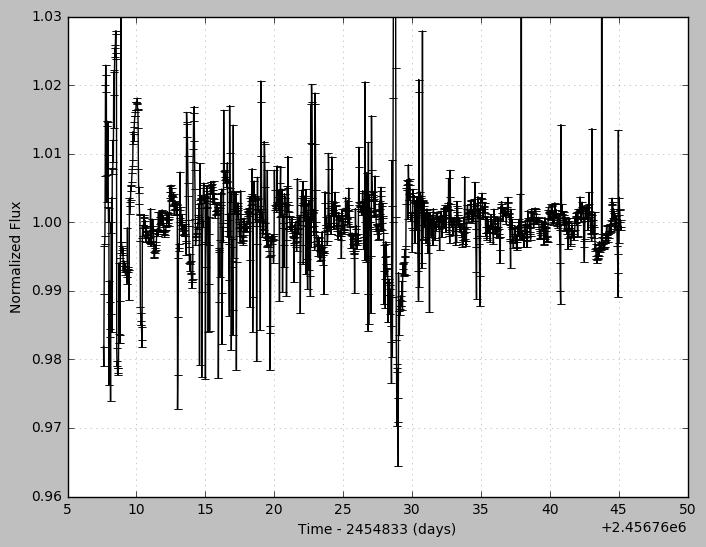

In [152]:
aperlccorr.plot()
plt.ylim(0.96,1.03)